# Teoría de Grafos 

## Matriz de adyacencia 

Para analizar un grafo existen dos formas:
- Lista de ejes o edgelist
- Matriz de adyacencia

La lista de ejes es simplemente una lista en la que se indican todas las conexiones. Mientras que la matriz de adyacencia es una matriz de dimensión $N\times N$, siendo $N$ el número de nodos y donde aparece un 1 si la conexión entre un par de nodos existe y un 0 de lo contrario. Para grafos ponderados, en vez de un 1, la matriz presenta el valor del peso de la conexión. 

La desventaja de la matriz de adyacencia, es que para grafos muy grandes, puede ocupar mucho espacio. Por este motivo, se utiliza con frecuencia una matriz de adyacencia sparse, que internamente únicamente almacena la información de las conexiones existentes, es decir, no almacena los ceros

![alt-image](../resources/figure_1.png)

$$A = \left[ \begin{matrix} 
0 & 1 & 0 & 1 & 1 \\
1 & 0 & 1 & 1 & 0 \\
0 & 1 & 0 & 0 & 0 \\
1 & 1 & 0 & 0 & 1 \\
1 & 0 & 0 & 1 & 0
\end{matrix} \right]$$

### Formulación matemática 

La matriz de adyacencia de un grafo dirigido de $N$ nodos tiene $N$ filas y $N$ columnas, siendo sus elementos:
- $A_{ij} = 1$ si existe un enlace que apunta desde el nodo $j$ al nodo $i$
- $A_{ij} = 0$ si los nodos $i$ y $j$ no están conectados entre sí

## Meta-información de nodos y ejes

La información adicional de los nodos y enlaces que no pertenece estrictamente al grafo se denomina *meta-información* y suele almacenar a modo de tabla, cuyas filas son los nodos o enlaces y sus columnas son las variables disponibles de cada uno. Si se utiliza el ejemplo de la red social, la meta-información de los nodos podría ser el nombre, edad, aficiones, etc. 

## Grafos bipartitos y proyecciones

Un grafo bipartito es una red cuyos nodos se pueden dividir en dos conjuntos disjuntos $U$ y $V$ de tal manera que los enlaces conectan nodos de $U$ con nodos de $V$. En otras palabras, si se colorean los nodos $U$ de verde y los nodos $V$ de morado, únicamente existen enlaces que conecten nodos de diferentes colores.

![alt-image](../resources/figure_2.png)

*Proyección del subconjunto de nodos [1,2,3,4,5,6,7]*

![alt-image](../resources/figure_3.png)

Es posible generar dos proyecciones para cada red bipartita. La primera proyección conecta nodos $U$ si estos están conectados con el mismo nodo $V$ en la representación bipartita. La segunda proyección conecta nodos $V$ si estos están conectados con el mismo nodo $U$ en la representación bipartita

## Algunas propiedades en los vértices y nodos

**Clustering**: medida de la cantidad de enlaces existentes entre los vecinos de un nodo

### Medidads de Centralidad

**Centralidad de grafo**: es la medida más simple, se basa en el número de enlaces que tiene un nodo, la suma de enlaces que entran y salen

**Centralidad de intermediación**: mide la cantidad de caminos que pasan por un nodo

**Centralidad de cercanía**: mide la distancia promedio desde un nodo a todos los demás nodos del grafo

## Grafos con NetworkX

`NetworkX` es una librería de Python más utilizada para trabajar con grafos y redes. Permite crear, manipular y analizar grafos de manera eficiente. 

Una de las principales ventajas de `NetworkX` es su capacidad para trabajar con grafos de gran tamaño y complejidad, permitiendo manejar grafos con millones de nodos y enlaces. La librería cuenta con una gran variedad de funcionalidades que permiten crear, importar y exportar grafos en múltiples formatos, así como analizar las propiedades de estas redes (grado medio, la densidad, el coeficiente de clustering, el camino más corto entre dos nodos, y muchas otras más). Además, cuenta con una serie de algoritmos para buscar patrones, como la detección de comunidades, detección de centralidad y detección de componentes conectados.

## Importación de Librerías necesarias

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

## Creación manual

In [2]:
# Grafo vacio
G = nx.Graph()

print(f"""====== Informacion del grafo ======
G              -> {G}
Es dirigido?   -> {G.is_directed()}
Es multigrafo? -> {G.is_multigraph()}
""")

====== Informacion del grafo ======
G              -> Graph with 0 nodes and 0 edges
Es dirigido?   -> False
Es multigrafo? -> False



Graph with 1 nodes and 0 edges


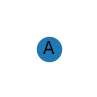

In [3]:
# Adicion de un nodo 
G.add_node('A')

fig, ax = plt.subplots(figsize=(1,1))
nx.draw(G, with_labels=True, ax=ax)
print(G)

Graph with 3 nodes and 0 edges


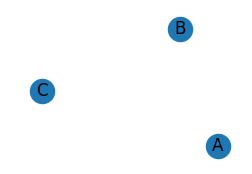

In [4]:
# Adicion de multiples nodos
G.add_nodes_from(['B', 'C'])

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

Graph with 3 nodes and 1 edges


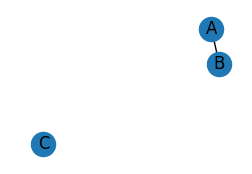

In [5]:
# Adicion de una arista
G.add_edge('A', 'B')

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

Graph with 3 nodes and 3 edges


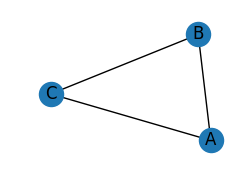

In [6]:
# Adicion de multiples aristas 
G.add_edges_from([('A', 'C'), ('B', 'C')])

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

Graph with 6 nodes and 5 edges


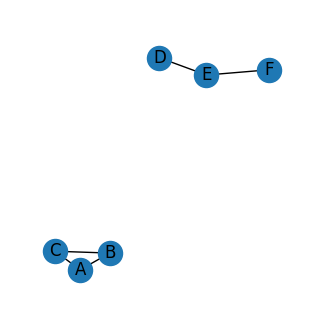

In [7]:
# Adicion de nodos en el grafo segun las aristas que se añadan
G.add_edges_from([('D', 'E'), ('E', 'F')])

fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

## Matriz de adyacencia de un grafo

In [8]:
adj = nx.adjacency_matrix(G)

adj = adj.todense()
adj

array([[0, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])

In [9]:
print(f"""===== Informacion del grafo =====
Nodos del grafo:      {G.nodes}
Aristas del grafo:    {G.edges}
""")

===== Informacion del grafo =====
Nodos del grafo:      ['A', 'B', 'C', 'D', 'E', 'F']
Aristas del grafo:    [('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'), ('E', 'F')]



## Creación desde un DataFrame

In [10]:
collection = pd.DataFrame(
  {
    "begin": ['A', 'B', 'C'],
    "end":   ['C', 'C', 'D']
  }
)
collection

,begin,end
0,A,C
1,B,C
2,C,D


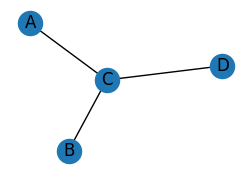

In [11]:
fig, ax = plt.subplots(figsize=(3,2))
G = nx.from_pandas_edgelist(collection, source="begin", target="end")
nx.draw(G, with_labels=True, ax=ax)

## Grafos Dirigidos

In [12]:
# Creacion manual
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (1, 4), (1, 5), (4, 2), (5, 4)])

print(f"""====== Informacion del grafo ======
G              -> {G}
Es dirigido?   -> {G.is_directed()}
Es multigrafo? -> {G.is_multigraph()}
""")

====== Informacion del grafo ======
G              -> DiGraph with 5 nodes and 6 edges
Es dirigido?   -> True
Es multigrafo? -> False



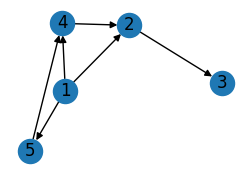

In [13]:
# Representacion grafica 
fig, ax = plt.subplots(figsize=(3,2))
nx.draw(G, with_labels=True, ax=ax)

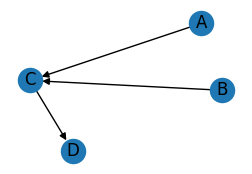

In [14]:
# Creacion desde un DataFrame
G = nx.from_pandas_edgelist(
  collection,
  source = "begin",
  target = "end",
  create_using = nx.DiGraph
)
fig, ax = plt.subplots(figsize=(3,2))
nx.draw(G, with_labels=True, ax=ax)

In [15]:
# Matriz de adjacencia
## No es SIMETRICA

adj = nx.adjacency_matrix(G)
adj = adj.todense()
adj

array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 0]])

## Distancia entre dos nodos

Para obtener la distancia de orden 2 entre cualquier par de nodos, basta con multiplicar la matriz de adyacencia por sí misma. Si la multiplicamos por sí misma `n` veces, obtenemos la matriz de distancias de orden `n`

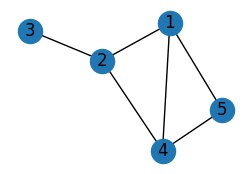

In [16]:
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (1, 4), (1, 5), (4, 2), (5, 4)])

fig, ax = plt.subplots(figsize=(3,2))
nx.draw(G, with_labels=True, ax=ax)

In [17]:
# Matriz de adyacencia
adj = nx.adjacency_matrix(G).todense()
adj

array([[0, 1, 0, 1, 1],
       [1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 1, 0, 0, 1],
       [1, 0, 0, 1, 0]])

In [18]:
# Distancia de orden 2
dist_o2 = adj @ adj
dist_o2

array([[3, 1, 1, 2, 1],
       [1, 3, 0, 1, 2],
       [1, 0, 1, 1, 0],
       [2, 1, 1, 3, 1],
       [1, 2, 0, 1, 2]])

In [19]:
print(f"Caminos de orden dos entre los nodos 2 y 5  ->  {dist_o2[1,4]}")

Caminos de orden dos entre los nodos 2 y 5  ->  2


### Camino más corto o Shortest Path

In [20]:
nx.shortest_path(G, source=2, target=5)

[2, 1, 5]

## Grafo Ponderado

In [21]:
# Creacion del grafo
G = nx.Graph()
G.add_weighted_edges_from(
  [(1, 2, 0.5),
  (2, 3, 0.9),
  (1, 4, 0.1),
  (1, 5, 0.75),
  (4, 2, 0.01),
  (5, 4, 0.3)]
)
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.5}), (1, 4, {'weight': 0.1}), (1, 5, {'weight': 0.75}), (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.01}), (4, 5, {'weight': 0.3})])

In [22]:
print(f"""
G             -> {G}
Es dirigido   -> {G.is_directed()}
Es ponderado  -> {nx.is_weighted(G)}
""")

[a for a in G.edges(data=True)]


G             -> Graph with 5 nodes and 6 edges
Es dirigido   -> False
Es ponderado  -> True



[(1, 2, {'weight': 0.5}),
 (1, 4, {'weight': 0.1}),
 (1, 5, {'weight': 0.75}),
 (2, 3, {'weight': 0.9}),
 (2, 4, {'weight': 0.01}),
 (4, 5, {'weight': 0.3})]

In [23]:
w = [a[2]['weight'] for a in G.edges(data=True)]

## Layouts

In [39]:
# Algunos ejemplos de layouts utilizados 

#pos = nx.spring_layout(G)
#pos = nx.bipartite_layout(G)
#pos = nx.circular_layout(G)
#pos = nx.kamada_kawai_layout(G)
#pos = nx.planar_layout(G)
pos = nx.random_layout(G)
#pos = nx.shell_layout(G)
#pos = nx.spectral_layout(G)
#pos = nx.spiral_layout(G)

TypeError: unsupported operand type(s) for *: 'int' and 'dict'

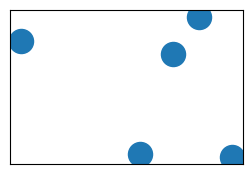

In [40]:
fig, ax = plt.subplots(figsize=(3,2))
nx.draw_networkx_nodes(
  G,
  pos = pos,
  ax = ax
)
nx.draw_networkx_edges(
  G,
  pos = pos,
  edgelist = G.edges,
  width = w,
  ax = ax
);

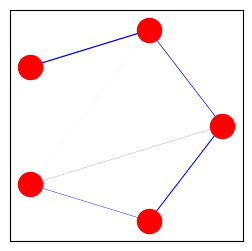

In [26]:
# Representacion de forma separada los nodos y ejes para mayor control sobre caracteristicas visuales
pos = nx.circular_layout(G)

fig, ax = plt.subplots(figsize=(3,3))
nx.draw_networkx_nodes(G, pos=pos, node_color="red", ax=ax)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges, width=w, edge_color="blue", ax=ax);

## Grafo bipartito

En este tipo de grafos, las conexiones únicamente pueden ocurrir entre nodos de distinta naturaleza. 

En el siguiente ejemplo definiremos un grafo semejante a:

![alt-image](../resources/image_4.png)

In [27]:
G = nx.Graph()

G.add_nodes_from(['Movie 1', 'Movie 2', 'Movie 3'], bipartite='Movies')
G.add_nodes_from(['Actor 1', 'Actor 2', 'Actor 3'], bipartite='Actors')

G.add_edges_from([
    ('Movie 1', 'Actor 1'),
    ('Movie 2', 'Actor 2'),
    ('Movie 3', 'Actor 3'),
    ('Movie 2', 'Actor 3'),
    ('Movie 2', "Actor 1"),
  ]
)

In [28]:
G.nodes(data=True)

NodeDataView({'Movie 1': {'bipartite': 'Movies'}, 'Movie 2': {'bipartite': 'Movies'}, 'Movie 3': {'bipartite': 'Movies'}, 'Actor 1': {'bipartite': 'Actors'}, 'Actor 2': {'bipartite': 'Actors'}, 'Actor 3': {'bipartite': 'Actors'}})

In [29]:
node_type = [G.nodes[i]['bipartite'] for i in G.nodes()]
node_type

['Movies', 'Movies', 'Movies', 'Actors', 'Actors', 'Actors']

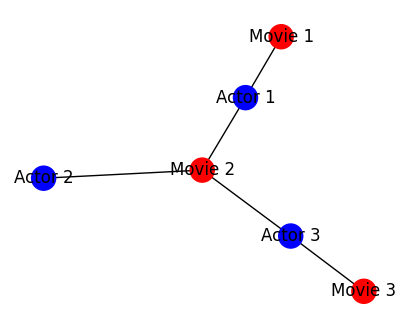

In [30]:
colors = {'Movies': 'red', 'Actors': 'blue'}
colors_nodes = [colors[n] for n in node_type]

fig, ax = plt.subplots(figsize=(5, 4))
nx.draw(
  G,
  pos=nx.spring_layout(G),
  with_labels=True,
  node_color=colors_nodes,
  ax=ax,
)

> `with_labels=True` se muestran las etiquetas de los nodos
> 
> `node_colors` se asigna el color de cada nodo

### Proyección en Grafos Bipartitos

(-1.4166042807888626, 1.0795021930637447)

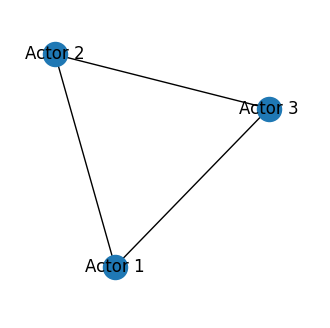

In [31]:
nodes_bipartite = [
  n[0]
  for n in G.nodes(data=True)
  if n[1]['bipartite'] == 'Actors'
]

# Proyeccion del grafo bipartito para obtener solo los nodos del grupo A
G_actores = nx.bipartite.projected_graph(G, nodes_bipartite)

fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(G_actores, with_labels=True, ax=ax)
ax.set_xlim([1.2 * x for x in ax.get_xlim()])
ax.set_ylim([1.2 * y for y in ax.get_ylim()])

## Meta-información: Atributos en nodos y aristas

In [32]:
# Creacion del grafo
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (1, 4), (1, 5), (4, 2), (5, 4)])
G.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 4, {}), (1, 5, {}), (2, 3, {}), (2, 4, {}), (4, 5, {})])

In [33]:
# Añadir atributos de los nodos
node_name = {1: "Jaime", 2: "Maria", 3: "Julio", 4: "Rosa", 5: "Alberto"}

node_hobbies = {
    1: ["Futbol"],
    2: ["Dance", "Play"],
    3: ["Golf", "Dance"],
    4: ["Cook"],
    5: ["Cook", "Play"],
}

nx.set_node_attributes(G, node_name, name="Name")
nx.set_node_attributes(G, node_hobbies, name="Hobby")

In [34]:
# Añadir atributos de las aristas
edges_weight = {
    (1, 2): 0.5,
    (2, 3): 0.9,
    (1, 4): 0.1,
    (1, 5): 0.75,
    (4, 2): 0.01,
    (5, 4): 0.3,
}

nx.set_edge_attributes(G, edges_weight, name="weight")

In [35]:
G.nodes(data=True)

NodeDataView({1: {'Name': 'Jaime', 'Hobby': ['Futbol']}, 2: {'Name': 'Maria', 'Hobby': ['Dance', 'Play']}, 3: {'Name': 'Julio', 'Hobby': ['Golf', 'Dance']}, 4: {'Name': 'Rosa', 'Hobby': ['Cook']}, 5: {'Name': 'Alberto', 'Hobby': ['Cook', 'Play']}})

In [36]:
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.5}), (1, 4, {'weight': 0.1}), (1, 5, {'weight': 0.75}), (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.01}), (4, 5, {'weight': 0.3})])

In [37]:
print('===== Informacion sobre las aristas =====')
for m,n,w in G.edges(data=True):
  print(f"""Aristas que conecta el nodo {m} con el nodo {n}  ->  Peso de {w['weight']} """)

===== Informacion sobre las aristas =====
Aristas que conecta el nodo 1 con el nodo 2  ->  Peso de 0.5 
Aristas que conecta el nodo 1 con el nodo 4  ->  Peso de 0.1 
Aristas que conecta el nodo 1 con el nodo 5  ->  Peso de 0.75 
Aristas que conecta el nodo 2 con el nodo 3  ->  Peso de 0.9 
Aristas que conecta el nodo 2 con el nodo 4  ->  Peso de 0.01 
Aristas que conecta el nodo 4 con el nodo 5  ->  Peso de 0.3 
